In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in and explore data
df = pd.read_csv("realtor-data.csv")
df.shape

(203126, 12)

In [3]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
df.duplicated().sum()

182207

In [5]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(20919, 12)

In [6]:
df = df.drop(columns=['status','full_address','street', 'state', 'sold_date'])
df = df.dropna(axis=0, how="any")
print(df.shape)
print(df.isna().sum().sum())

(13062, 7)
0


In [7]:
df.city.value_counts()[0:10]

Boston         520
Providence     314
Warwick        215
San Juan       199
Hartford       182
Cranston       170
Springfield    142
Pawtucket      138
Manchester     137
New Britain    135
Name: city, dtype: int64

In [8]:
# We will do Boston, Worcester, and Springfield seperately.
df_bos = df.loc[df.city=='Boston']
df_pro = df.loc[df.city=='Providence']
print(df_bos.shape, df_pro.shape)

(520, 7) (314, 7)


In [9]:
# df_bos
df_bos = df_bos.reset_index(drop=True)
df_bos = df_bos.drop(columns=['city'])
df_bos.head()

,price,bed,bath,acre_lot,zip_code,house_size
0,650000.0,1.0,1.0,0.02,2135.0,688.0
1,739000.0,2.0,1.0,0.03,2130.0,1250.0
2,1200000.0,9.0,3.0,0.09,2131.0,3204.0
3,949000.0,3.0,3.0,0.06,2130.0,2623.0
4,9750000.0,4.0,7.0,1.00,2115.0,4754.0


In [10]:
# df_pro
df_pro = df_pro.reset_index(drop=True)
df_pro = df_pro.drop(columns=['city'])
df_pro.head()

,price,bed,bath,acre_lot,zip_code,house_size
0,150000.0,4.0,2.0,0.05,2909.0,2336.0
1,319900.0,3.0,3.0,0.07,2905.0,1331.0
2,139900.0,3.0,2.0,0.11,2908.0,1683.0
3,159900.0,4.0,2.0,0.11,2905.0,2147.0
4,239900.0,6.0,3.0,0.07,2905.0,3863.0


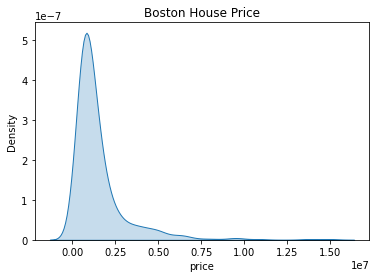

In [11]:
# EDA
import seaborn as sns
sns.kdeplot(df_bos['price'], shade=True)
plt.title('Boston House Price')
plt.show()

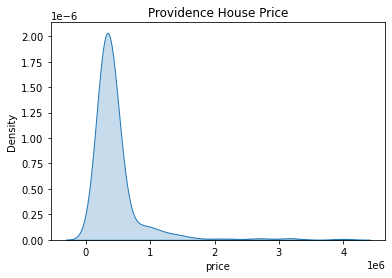

In [12]:
sns.kdeplot(df_pro['price'], shade=True)
plt.title('Providence House Price')
plt.show()

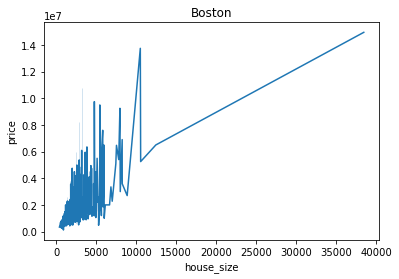

In [13]:
sns.lineplot(data=df_bos, x=df_bos['house_size'], y=df_bos['price'])
plt.title("Boston")
plt.show()

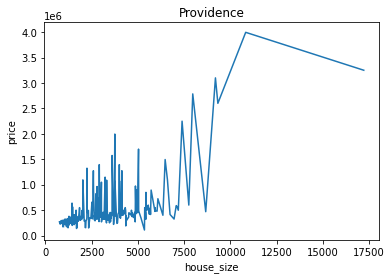

In [14]:
sns.lineplot(data=df_pro, x=df_pro['house_size'], y=df_pro['price'])
plt.title("Providence")
plt.show()

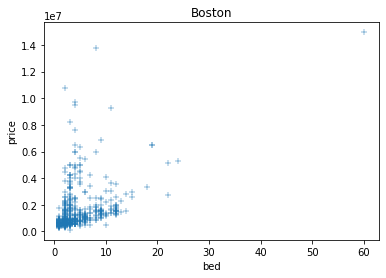

In [15]:
sns.scatterplot(data=df_bos, x=df_bos['bed'], y=df_bos['price'], marker="+")
plt.title("Boston")
plt.show()

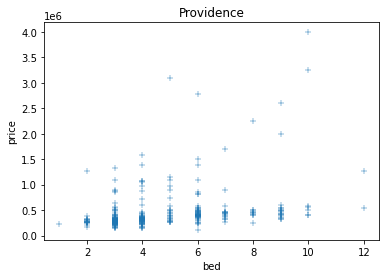

In [16]:
sns.scatterplot(data=df_pro, x=df_pro['bed'], y=df_pro['price'], marker="+")
plt.title("Providence")
plt.show()

In [17]:
# Remove outliers
from scipy import stats
df_bos = df_bos[(np.abs(stats.zscore(df_bos['house_size'])) < 3)]
df_pro = df_pro[(np.abs(stats.zscore(df_pro['house_size'])) < 3)]
print(df_bos.shape, df_pro.shape)

(516, 6) (310, 6)


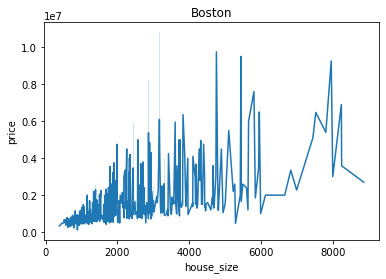

In [18]:
# Visualization after removing outliers
sns.lineplot(data=df_bos, x=df_bos['house_size'], y=df_bos['price'])
plt.title("Boston")
plt.show()

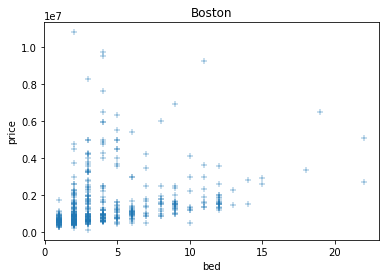

In [19]:
sns.scatterplot(data=df_bos, x=df_bos['bed'], y=df_bos['price'], marker="+")
plt.title("Boston")
plt.show()

In [20]:
# zip code
df_bos.zip_code.value_counts()

2127.0    57
2128.0    49
2116.0    39
2135.0    33
2125.0    33
2118.0    31
2124.0    30
2131.0    26
2130.0    23
2114.0    21
2136.0    18
2132.0    17
2134.0    15
2119.0    15
2121.0    14
2111.0    13
2122.0    10
2115.0    10
2129.0     9
2126.0     9
2113.0     8
2110.0     8
2108.0     7
2109.0     6
2467.0     4
2210.0     4
2120.0     3
2199.0     2
2215.0     2
Name: zip_code, dtype: int64

In [21]:
df_pro.zip_code.value_counts()

2909.0    78
2908.0    74
2904.0    44
2907.0    35
2905.0    33
2906.0    33
2903.0    11
2910.0     2
Name: zip_code, dtype: int64

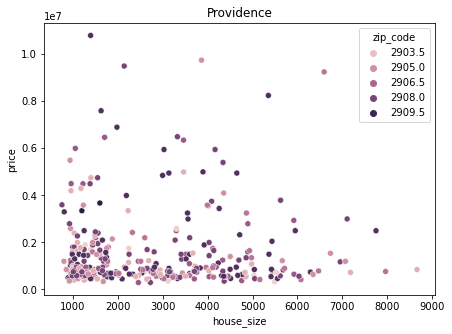

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pro, x=df_pro['house_size'], y=df_bos['price'], hue="zip_code")
plt.title("Providence")
plt.show()

In [23]:
df_pro.groupby(df_pro.zip_code)["price"].mean()

zip_code
2903.0    894517.909091
2904.0    351277.000000
2905.0    308766.636364
2906.0    961660.575758
2907.0    330234.228571
2908.0    355131.959459
2909.0    363414.102564
2910.0    247450.000000
Name: price, dtype: float64

In [24]:
# Remove column zip_code but save it
bos_zip = list(df_bos.zip_code.unique())
pro_zip = list(df_pro.zip_code.unique())
df_bos = df_bos.drop(columns=['zip_code'])
df_pro = df_pro.drop(columns=['zip_code'])
print(df_bos.shape, df_pro.shape)

(516, 5) (310, 5)


In [25]:
# Scaling data and split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_bos = df_bos.drop(columns=['price'])
y_bos = df_bos['price']
X_bos_train, X_bos_test, y_bos_train, y_bos_test = train_test_split(X_bos, y_bos, test_size=0.2, random_state=42)

In [26]:
X_pro = df_pro.drop(columns=['price'])
y_pro = df_pro['price']
X_pro_train, X_pro_test, y_pro_train, y_pro_test = train_test_split(X_pro, y_pro, test_size=0.2, random_state=42)

scaler_bos = MinMaxScaler()
X_bos_train_scaled = scaler_bos.fit_transform(X_bos_train)*10 # fit it on the training data Bos
scaler_pro = MinMaxScaler()
X_pro_train_scaled = scaler_pro.fit_transform(X_pro_train)*10 # fit it on the training data Pro

print(X_bos_train_scaled.shape, y_bos_test.shape, X_pro_train_scaled.shape, y_pro_test.shape)

(412, 4) (104,) (248, 4) (62,)


In [27]:
print(X_bos_train_scaled.min(), X_bos_train_scaled.max(), X_pro_train_scaled.min(), X_pro_train_scaled.max())

0.0 10.000000000000002 0.0 10.000000000000002


In [28]:
# Boston
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_bos_train_scaled, y_bos_train)

LinearRegression()

In [29]:
lin_reg.intercept_, lin_reg.coef_

(455160.0045273255,
 array([-667205.93637495,  345107.21445382,  108853.52629967,
         644278.80525312]))

In [30]:
X_bos_test_scaled = scaler_bos.transform(X_bos_test)*10
lin_reg.score(X_bos_train_scaled, y_bos_train)
lin_reg.score(X_bos_test_scaled, y_bos_test)

0.5877544303216063

In [34]:
# Ridge Regression
from sklearn.linear_model import Ridge
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 500]
for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_bos_train_scaled, y_bos_train)
    print(f'alpha = {a}')
    print("lr.coef_: %s" % ridge.coef_)
    print("lr.intercept_: %s" % ridge.intercept_)
    print("training set score: %f" % ridge.score(X_bos_train_scaled, y_bos_train))
    print("test set score: %f" % ridge.score(X_bos_test_scaled, y_bos_test))
    print('-----------------')

alpha = 0.001
lr.coef_: [-667201.90050322  345107.62718049  108852.50860622  644275.37656806]
lr.intercept_: 455161.1665214428
training set score: 0.503859
test set score: 0.587756
-----------------
alpha = 0.01
lr.coef_: [-667165.57977085  345111.34086676  108843.3502774   644244.52060306]
lr.intercept_: 455171.6239204989
training set score: 0.503859
test set score: 0.587768
-----------------
alpha = 0.1
lr.coef_: [-666802.58151649  345148.3932909   108751.85721332  643936.17865207]
lr.intercept_: 455276.14369686623
training set score: 0.503859
test set score: 0.587887
-----------------
alpha = 1
lr.coef_: [-663193.37460839  345510.55159253  107845.85852447  640874.37418336]
lr.intercept_: 456315.9575062074
training set score: 0.503854
test set score: 0.589070
-----------------
alpha = 10
lr.coef_: [-629055.77549332  348367.71232757   99596.95231408  612273.30712804]
lr.intercept_: 466210.6426500549
training set score: 0.503365
test set score: 0.599706
-----------------
alpha = 100
lr

In [36]:
# Choose alpha = 100
ridge = Ridge(alpha = 100)
ridge.fit(X_bos_train_scaled, y_bos_train)
ridge.score(X_bos_test_scaled, y_bos_test)

0.6419274619492521

In [50]:
# Polynomial Regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
degree = [2,3,4]
for d in degree:
    poly_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=d, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
    poly_reg.fit(X_bos_train_scaled, y_bos_train)
    print(poly_reg.score(X_bos_train_scaled, y_bos_train))
    print(poly_reg.score(X_bos_test_scaled, y_bos_test))
    print("----------------")


0.6449614692453058
0.39911833409899267
----------------
0.7403206852572114
0.5106988545826554
----------------
0.798628122342269
-113.39822290920556
----------------


In [55]:
# KNN
from sklearn import neighbors
for k in range(1, 20):
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_bos_train_scaled, y_bos_train)
    print(f"neighbors: {k}", knn.score(X_bos_train_scaled, y_bos_train), knn.score(X_bos_test_scaled, y_bos_test))

neighbors: 1 0.9959602003047968 0.19664356137254402
neighbors: 2 0.8109329013614626 0.4960603219320736
neighbors: 3 0.7240652444899449 0.5927124947577641
neighbors: 4 0.6685050565135175 0.6941089374006539
neighbors: 5 0.6408908903046923 0.6914591365397513
neighbors: 6 0.6284621190551074 0.7114773027716809
neighbors: 7 0.6213148008005578 0.7362398363477516
neighbors: 8 0.6057157042607579 0.7428081789485685
neighbors: 9 0.5967946686739605 0.7547598390564156
neighbors: 10 0.6050097086642825 0.7502051128968322
neighbors: 11 0.5810738742172248 0.7646159772301154
neighbors: 12 0.5772660070750404 0.7672224456098442
neighbors: 13 0.573539612660918 0.7603712719137155
neighbors: 14 0.5618655509538923 0.7464535363508367
neighbors: 15 0.5535315513008956 0.7353472068528233
neighbors: 16 0.5437559409506407 0.7261681907728283
neighbors: 17 0.5289165619889127 0.727702506210061
neighbors: 18 0.5184556701628612 0.7361186659875092
neighbors: 19 0.5190100001435698 0.7261425827484


In [56]:
# Choose k=10
knn = neighbors.KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_bos_train_scaled, y_bos_train)
print("neighbors: 10 ", knn.score(X_bos_train_scaled, y_bos_train), knn.score(X_bos_test_scaled, y_bos_test))

neighbors: 10  0.6050097086642825 0.7502051128968322


In [98]:
# XGB Regression
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(max_depth=10, eta=0.026)
xgb_reg.fit(X_bos_train_scaled, y_bos_train)
print(xgb_reg.score(X_bos_train_scaled, y_bos_train), xgb_reg.score(X_bos_test_scaled, y_bos_test))

0.9254022959000151 0.7667874100983035


In [100]:
# Choose XGB Regression
xgb_reg_bos = XGBRegressor(max_depth=10, eta=0.026)
xgb_reg_bos.fit(X_bos_train_scaled, y_bos_train)
print(xgb_reg_bos.score(X_bos_train_scaled, y_bos_train), xgb_reg_bos.score(X_bos_test_scaled, y_bos_test))

0.9254022959000151 0.7667874100983035


In [101]:
# Try to apply XGB Regression to Providence data
X_pro_test_scaled = scaler_pro.transform(X_pro_test)*10

In [139]:
xgb_reg_pro = XGBRegressor(max_depth=8, eta=0.026)
xgb_reg_pro.fit(X_pro_train_scaled, y_pro_train)
print(xgb_reg_pro.score(X_pro_train_scaled, y_pro_train), xgb_reg_pro.score(X_pro_test_scaled, y_pro_test))

0.8906383559332484 0.6968743024196677
